# Data Preprocessing

In [1]:
# authenticate with Google Drive to load data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
import numpy as np
data_dir = 'gdrive/My Drive/EEG_Project/'
X_test = np.load(data_dir + "X_test.npy")
y_test = np.load(data_dir + "y_test.npy")
person_train_valid = np.load(data_dir + "person_train_valid.npy")
X_train_valid = np.load(data_dir + "X_train_valid.npy")
y_train_valid = np.load(data_dir + "y_train_valid.npy")
person_test = np.load(data_dir + "person_test.npy")

In [0]:
# Ignore EOG data from last 3 of 25 electrodes
# Transpose data so that the second dimension is timesteps
X_test = X_test[:, :-3, :]
X_test = X_test.transpose([0, 2, 1])
X_train_valid = X_train_valid[:, :-3, :]
X_train_valid = X_train_valid.transpose([0, 2, 1])

In [6]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 1000, 22)
Test data shape: (443, 1000, 22)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [0]:
from sklearn import preprocessing

In [0]:
scaler = preprocessing.StandardScaler()

X_reshaped = np.reshape(X_train_valid, (X_train_valid.shape[0]*X_train_valid.shape[1], X_train_valid.shape[2]))
scaler.fit(X_reshaped)

X_reshaped = scaler.transform(X_reshaped)
X_train_valid = np.reshape(X_reshaped, (X_train_valid.shape[0], X_train_valid.shape[1], X_train_valid.shape[2]))

X_test_reshaped = np.reshape(X_test, (X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
X_test_reshaped = scaler.transform(X_test_reshaped)
X_test = np.reshape(X_test_reshaped, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

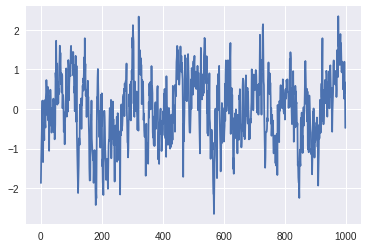

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_test[3, :, 14])

# Create Training/Validation Dataset, with Subsampling and Resampling 

In [0]:
np.random.seed(0)

In [0]:
# Turn labels into categories, i.e. y values of 0-3
le = preprocessing.LabelEncoder()
le.fit(y_train_valid)
y_train_valid_classes = le.transform(y_train_valid)
y_test_classes = le.transform(y_test)

In [0]:
rand_idx = np.random.permutation(X_train_valid.shape[0])
split = int(X_train_valid.shape[0] * 0.80)

In [0]:
# Create randomized train and validation dataset split
X_train = X_train_valid[rand_idx][:split]
y_train = y_train_valid_classes[rand_idx][:split]
person_train = person_train_valid[rand_idx][:split]

X_valid = X_train_valid[rand_idx][split:]
y_valid = y_train_valid_classes[rand_idx][split:]
person_valid = person_train_valid[rand_idx][split:]


In [0]:
# Downsample and resample data
from scipy import signal

X_train_downsampled = np.concatenate((X_train[:, 0::10, :], X_train[:, 1::10, :], X_train[:, 2::10, :], X_train[:, 3::10, :], X_train[:, 4::10, :], X_train[:, 5::10, :], X_train[:, 6::10, :], X_train[:, 7::10, :], X_train[:, 8::10, :], X_train[:, 9::10, :]))
X_train_processed = signal.resample(X_train_downsampled, 40, axis=1)
y_train_processed = np.concatenate((y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train))
person_train_processed = np.concatenate((person_train, person_train, person_train, person_train, person_train, person_train, person_train, person_train, person_train, person_train))

X_valid_downsampled = np.concatenate((X_valid[:, 0::10, :], X_valid[:, 1::10, :], X_valid[:, 2::10, :], X_valid[:, 3::10, :], X_valid[:, 4::10, :], X_valid[:, 5::10, :], X_valid[:, 6::10, :], X_valid[:, 7::10, :], X_valid[:, 8::10, :], X_valid[:, 9::10, :]))
X_valid_processed = signal.resample(X_valid_downsampled, 40, axis=1)
y_valid_processed = np.concatenate((y_valid, y_valid, y_valid, y_valid, y_valid, y_valid, y_valid, y_valid, y_valid, y_valid))
person_valid_processed = np.concatenate((person_valid, person_valid, person_valid, person_valid, person_valid, person_valid, person_valid, person_valid, person_valid, person_valid))

In [57]:
# Do the same for test set
X_test_downsampled = np.concatenate((X_test[:, 0::10, :], X_test[:, 1::10, :], X_test[:, 2::10, :], X_test[:, 3::10, :], X_test[:, 4::10, :], X_test[:, 5::10, :], X_test[:, 6::10, :], X_test[:, 7::10, :], X_test[:, 8::10, :], X_test[:, 9::10, :]))
X_test_processed = signal.resample(X_test_downsampled, 40, axis=1)
y_test_processed = np.concatenate((y_test_classes, y_test_classes, y_test_classes, y_test_classes, y_test_classes, y_test_classes, y_test_classes, y_test_classes, y_test_classes, y_test_classes))
person_test_processed = np.concatenate((person_test, person_test, person_test, person_test, person_test, person_test, person_test, person_test, person_test, person_test))

X_test_processed.shape

(4430, 40, 22)

In [58]:
num_trials = X_train_processed.shape[0]
num_timesteps = X_train_processed.shape[1]
num_features = X_train_processed.shape[2]

print(X_train_processed.shape)
print(y_train_processed.shape)
print(X_valid_processed.shape)
print(y_valid_processed.shape)

(16920, 40, 22)
(16920,)
(4230, 40, 22)
(4230,)


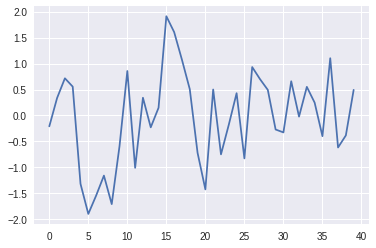

In [17]:
plt.plot(X_train_processed[0, :, 1])

# Build RNN Model (With Keras)

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras import optimizers
from keras import regularizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
checkpoint_path = data_dir + 'checkpoints/EEG_RNN.ckpt'
model_json_path = data_dir + 'checkpoints/EEG_RNN.json'
import keras.callbacks

# Create checkpoint callback
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True, 
                                                 monitor='val_loss',
                                                 save_best_only=True, 
                                                 mode='auto',
                                                 verbose=1)

In [0]:
# Build model architecture
model = Sequential()

model.add(LSTM(30, recurrent_dropout=0.25, kernel_regularizer=regularizers.l2(0.01), input_shape=(num_timesteps, num_features), return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(16, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=regularizers.l2(0.03)))
model.add(BatchNormalization())

# model.add(Dense(8, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
model.add(Dropout(0.6))

model.add(Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.05)))

In [75]:
model.summary()
with open(model_json_path, 'w') as f:
    f.write(model.to_json())
#model.load_weights(checkpoint_path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 40, 30)            6360      
_________________________________________________________________
batch_normalization_19 (Batc (None, 40, 30)            120       
_________________________________________________________________
lstm_20 (LSTM)               (None, 16)                3008      
_________________________________________________________________
batch_normalization_20 (Batc (None, 16)                64        
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
Total params: 9,620
Trainable params: 9,528
Non-trainable params: 92
_________________________________________________________________


# Train RNN Model

In [76]:
# Fit model on training set, validate with validation data
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train_processed, validation_data=(X_valid_processed, y_valid_processed), epochs=1000, batch_size=512, verbose=2, callbacks = [cp_callback])

Train on 16920 samples, validate on 4230 samples
Epoch 1/1000
 - 18s - loss: 4.1674 - acc: 0.2561 - val_loss: 3.1159 - val_acc: 0.2558

Epoch 00001: val_loss did not improve from 1.24986
Epoch 2/1000
 - 8s - loss: 3.6075 - acc: 0.2513 - val_loss: 2.7713 - val_acc: 0.2470

Epoch 00002: val_loss did not improve from 1.24986
Epoch 3/1000
 - 8s - loss: 3.1520 - acc: 0.2562 - val_loss: 2.5293 - val_acc: 0.2357

Epoch 00003: val_loss did not improve from 1.24986
Epoch 4/1000
 - 8s - loss: 2.8122 - acc: 0.2582 - val_loss: 2.3088 - val_acc: 0.2404

Epoch 00004: val_loss did not improve from 1.24986
Epoch 5/1000
 - 8s - loss: 2.5496 - acc: 0.2502 - val_loss: 2.1358 - val_acc: 0.2319

Epoch 00005: val_loss did not improve from 1.24986
Epoch 6/1000
 - 8s - loss: 2.3029 - acc: 0.2572 - val_loss: 1.9988 - val_acc: 0.2395

Epoch 00006: val_loss did not improve from 1.24986
Epoch 7/1000
 - 8s - loss: 2.1313 - acc: 0.2584 - val_loss: 1.8852 - val_acc: 0.2317

Epoch 00007: val_loss did not improve from

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

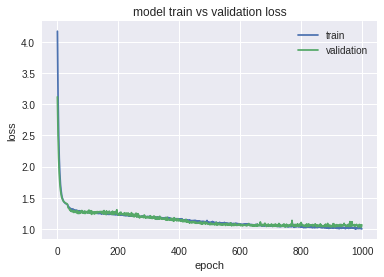

In [78]:
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Test RNN Model

In [0]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open(data_dir + 'checkpoints/EEG_RNN.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights(data_dir + 'checkpoints/EEG_RNN.ckpt')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
testResults = model.evaluate(X_test_processed, y_test_processed)
print("Test Loss: {}, Test Accuracy: {}".format(testResults[0], testResults[1]))

4430/4430 [==============================] - 20s 4ms/step
Test Loss: 1.1481360724494365, Test Accuracy: 0.5415349886864087
